In [1]:
#LOKSHABHA ELECTION 2024 RESULT DATA ANALYSIS

In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading our dataset
data=pd.read_csv(r"C:\Users\devis\OneDrive\Desktop\python data analysis\election_results_2024.csv")

In [4]:
data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [5]:
#Party with highest and lowest margin  of victory

In [6]:
party_votes=data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin']=pd.to_numeric(data['Margin'],errors='coerce')

#Party with highest and lowest margin of victory
highest_margin=data.loc[data['Margin'].idxmax()]
lowest_margin=data.loc[data['Margin'].idxmin()]

C:\Users\devis\AppData\Local\Temp\ipykernel_1116\1840345437.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_won.index,y=seats_won.values,palette='viridis')


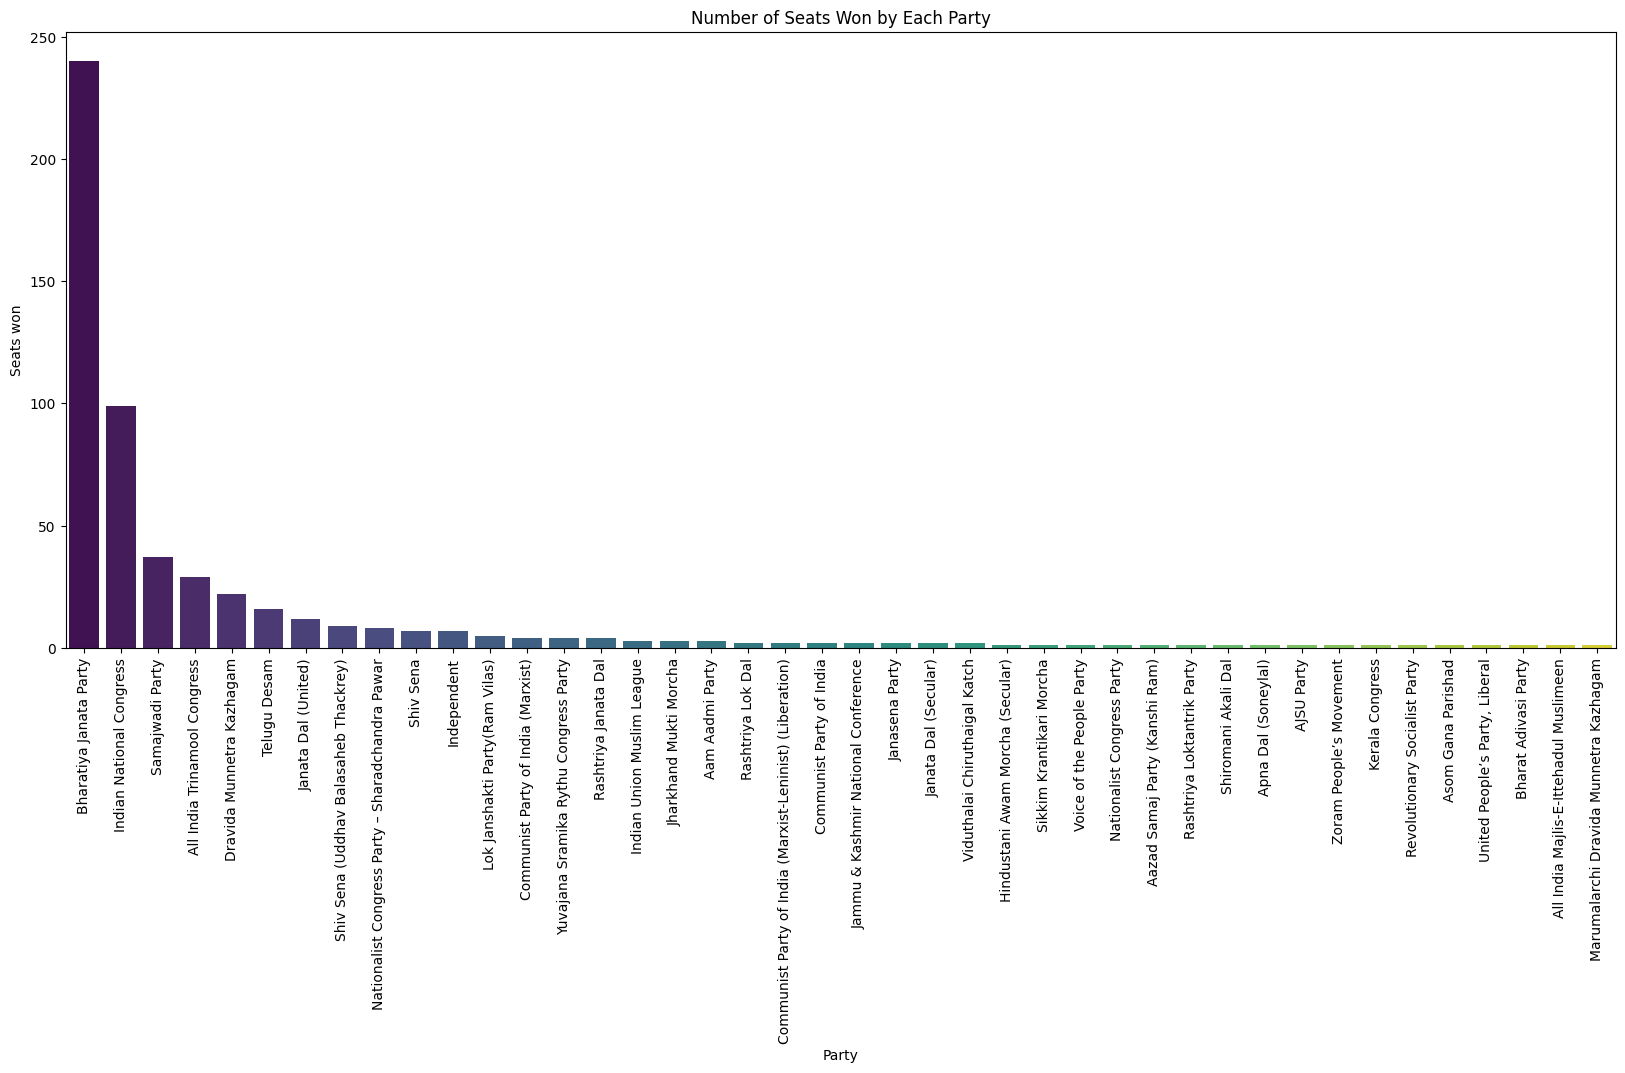

In [7]:
#PLot number of Seats won by each party
leading_party_highest_votes=party_votes.idxmax()
leading_party_lowest_votes=party_votes.idxmin()

#Number of seats won by each party
seats_won=data['Leading Party'].value_counts()

#Plot number of seats won by each party
plt.figure(figsize=(20,8))
sns.barplot(x=seats_won.index,y=seats_won.values,palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats won')
plt.xticks(rotation=90)
plt.show()


In [8]:
#Get the votes for Rahul Gandhi,Narendra Modi,and Amit Shah

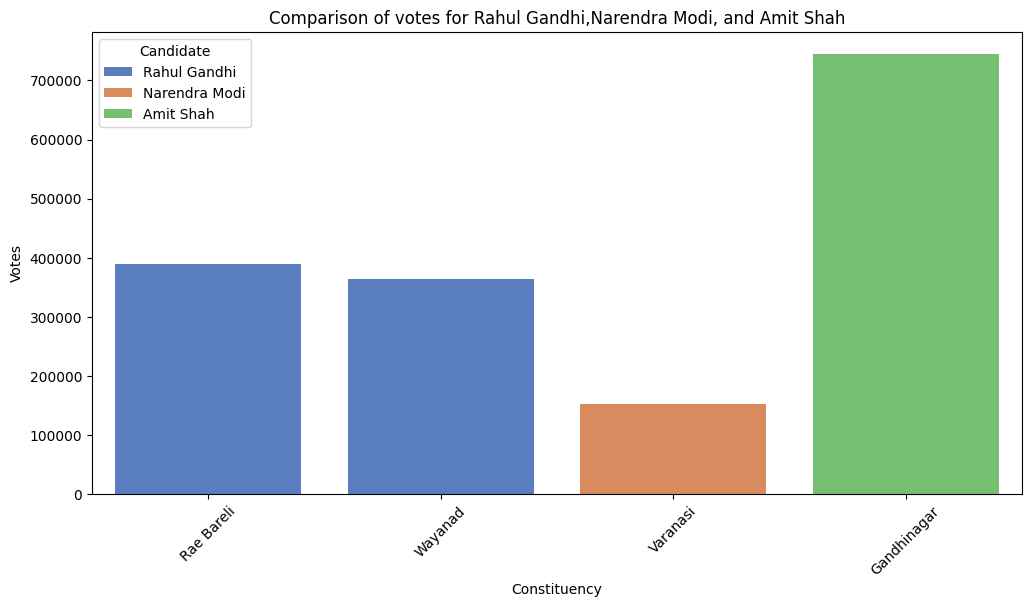

In [10]:
rahul_entries=data[data['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries=data[data['Leading Candidate'] == 'NARENDRA MODI']
amit_entries=data[data['Leading Candidate'] == 'AMIT SHAH']

#Get the votes for Rahul Gandhi,Narendra Modi,and Amit Shah
rahul_votes=rahul_entries['Margin'].values
modi_votes=modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes=amit_entries['Margin'].values[0] if not amit_entries.empty else 0

#Get the original constituency names for Rahul Gandhi
rahul_constituencies=list(rahul_entries['Constituency'])

#Get the original constituency name for Narendra Modi
modi_constituency=modi_entries['Constituency'].values[0] if not modi_entries.empty else "Mo"

##Get the original constituency name for Amit Shah
amit_constituency=amit_entries['Constituency'].values[0] if not amit_entries.empty else "Am"

#Combine the data
data_to_plot=pd.DataFrame({
    'Candidate':['Rahul Gandhi']*len(rahul_votes) +['Narendra Modi','Amit Shah'],
    'Constituency': rahul_constituencies + [modi_constituency,amit_constituency],
    'Votes': list(rahul_votes) + [modi_votes,amit_votes]
})

#Plot the comparison
plt.figure(figsize=(12,6))
sns.barplot(data=data_to_plot,x='Constituency',y='Votes',hue='Candidate',palette='muted')
plt.title("Comparison of votes for Rahul Gandhi,Narendra Modi, and Amit Shah")
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

In [11]:
#Highest and Lowest Victory Candidate

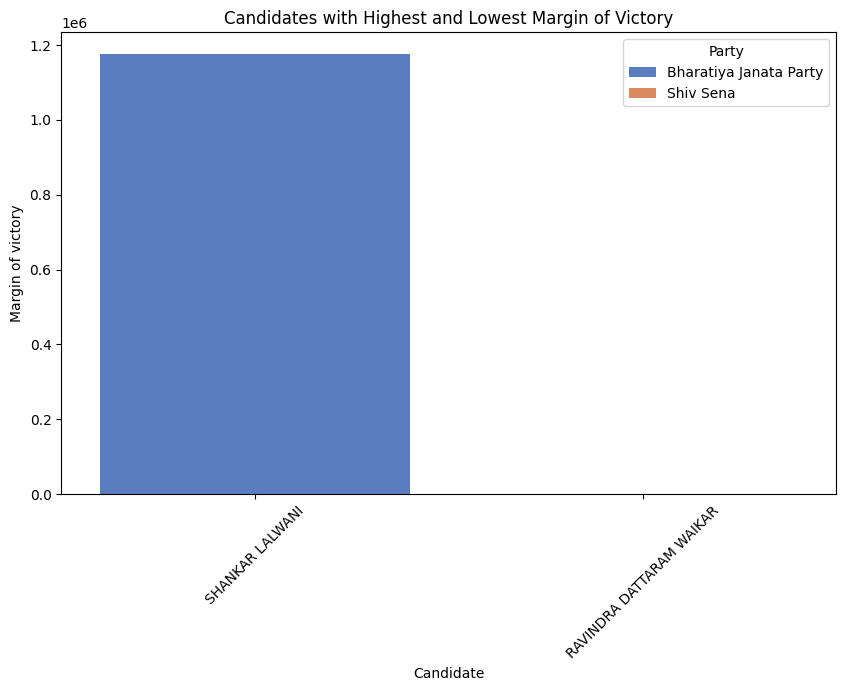

In [14]:
highest_margin_entry=data.loc[data['Margin'].idxmax()]
lowest_margin_entry=data.loc[data['Margin'].idxmin()]

#Combine the data
data_to_plot=pd.DataFrame({
    'Candidate':[highest_margin_entry['Leading Candidate'],lowest_margin_entry['Leading Candidate']],
    'Party':[highest_margin_entry['Leading Party'],lowest_margin_entry['Leading Party']],
    'Margin':[highest_margin_entry['Margin'],lowest_margin_entry['Margin']]
})

#Plot the comparison
plt.figure(figsize=(10,6))
sns.barplot(data=data_to_plot,x='Candidate',y='Margin',hue='Party',palette='muted')
plt.title("Candidates with Highest and Lowest Margin of Victory")
plt.xlabel('Candidate')
plt.ylabel('Margin of victory')
plt.xticks(rotation=45)
plt.show()

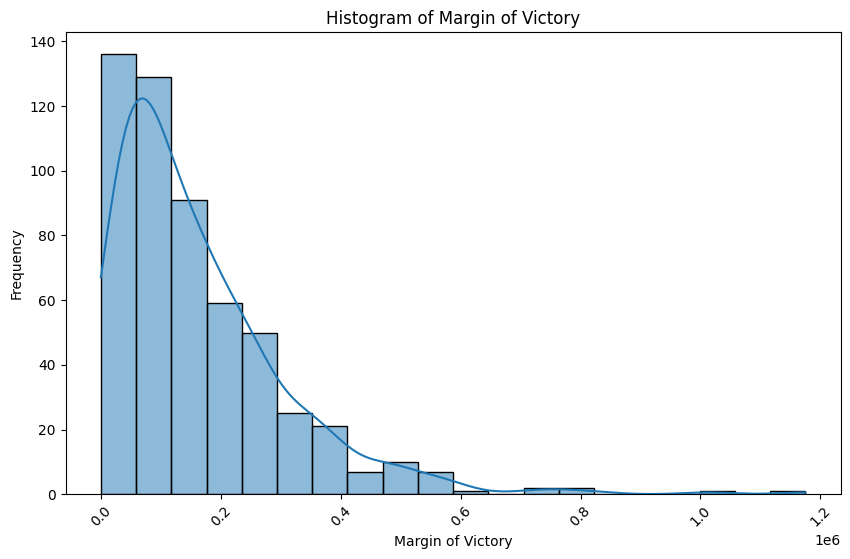

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data['Margin'],bins=20,kde=True)
plt.title("Histogram of Margin of Victory")
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [16]:
#VOTES DISTRIBUTION BY PARTY

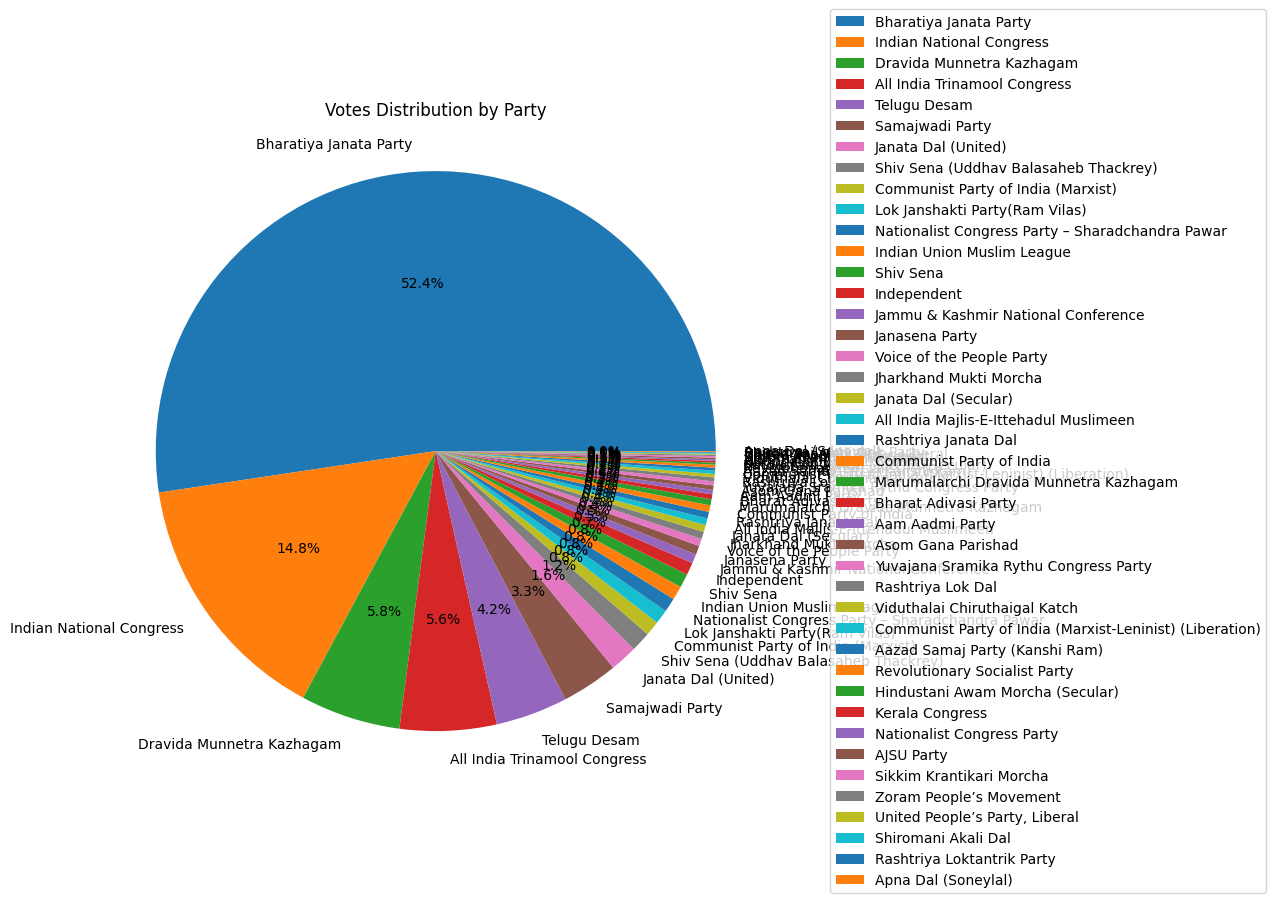

In [20]:
party_votes=data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

#Plot pie chart
plt.figure(figsize=(10,8))
plt.pie(party_votes, labels=party_votes.index, autopct='%1.1f%%')
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

plt.show()

In [ ]:
#Top 10 Trailing Party by Vote

In [21]:
trailing_party_votes=data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats=data['Trailing Party'].value_counts()

C:\Users\devis\AppData\Local\Temp\ipykernel_1116\2956265611.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')


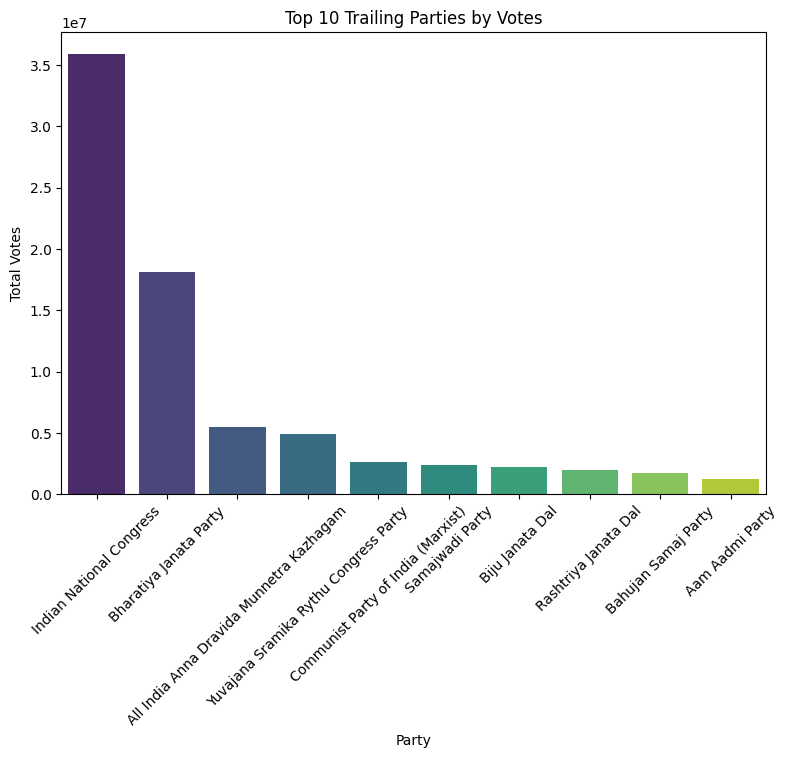

In [22]:
plt.figure(figsize=(20,6))

#Plot votes distribution by trailing party
plt.subplot(1,2,1)
sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')
plt.title("Top 10 Trailing Parties by Votes")
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()

In [23]:
#Top 10 Trailing Party by Seat

C:\Users\devis\AppData\Local\Temp\ipykernel_1116\3713216372.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')


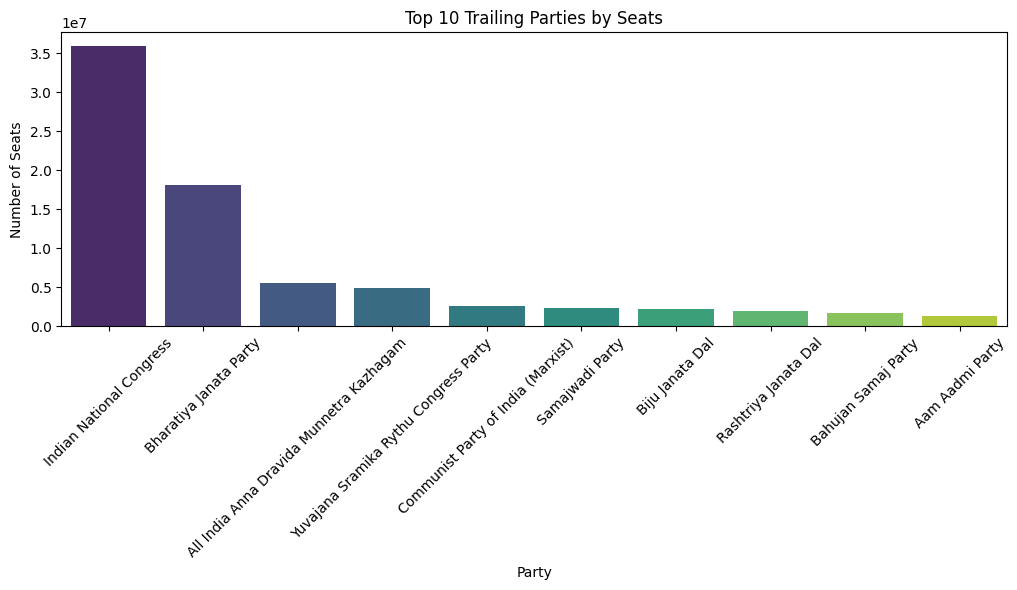

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')
plt.title("Top 10 Trailing Parties by Seats")
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()